In [1]:
import pandas as pd
import numpy as np

# 데이터 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.api import add_constant

from sklearn.svm import SVC 

# 모델 전처리
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


# grhpviz
from sklearn.tree import export_graphviz
import graphviz

# 로지스틱 회귀
from statsmodels.api import Logit
from sklearn.metrics import accuracy_score

# 의사결정나무
from sklearn.tree import DecisionTreeClassifier


# 랜덤포레스트
from sklearn.ensemble import RandomForestClassifier

# 그레디언트 부스팅
from sklearn.ensemble import GradientBoostingClassifier

# 모델 성능 평가
from sklearn.metrics import confusion_matrix

# 주피터 노트북 사용시 그래프 자동 출력 옵션
%matplotlib inline
matplotlib.rc('font', family = "NanumGothic")
plt.rc('font', family = "NanumGothic")
plt.rcParams["font.family"] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
inventory_price = pd.read_csv("Data_OTT/inventory_2.csv")

In [3]:
inventory_price.head()

,Unnamed: 0,item_id,contract_year,movie_id,title,price,release_year,release_date,runtime,mpa_rating,...,director,Genre_1,Genre_2,Genre_3,actor_1,actor_2,actor_3,contract_price,studio_score,price_class
0,0,I-1001,2015,tt0121766,Star Wars: Episode III - Revenge of the Sith,5500.0,2005,05-19-2005,140,PG-13,...,George Lucas,Action,Adventure,Fantasy,Ewan McGregor,Natalie Portman,Hayden Christensen,2700,10,10
1,1,I-1002,2015,tt0330373,Harry Potter and the Goblet of Fire,4500.0,2005,11-18-2005,157,PG-13,...,Mike Newell,Adventure,Family,Fantasy,Eric Sykes,Timothy Spall,David Tennant,2700,10,10
2,2,I-1003,2015,tt0363771,"The Chronicles of Narnia: The Lion, the Witc",5500.0,2005,12-09-2005,143,PG,...,Andrew Adamson,Adventure,Family,Fantasy,Georgie Henley,Skandar Keynes,William Moseley,2295,10,1
3,3,I-1004,2015,tt0383574,Pirates of the Caribbean: Dead Man's Chest,5500.0,2006,07-07-2006,151,PG-13,...,Gore Verbinski,Action,Adventure,Fantasy,Johnny Depp,Orlando Bloom,Keira Knightley,2295,10,1
4,4,I-1005,2015,tt0413300,Spider-Man 3,4000.0,2007,05-04-2007,139,PG-13,...,Sam Raimi,Action,Adventure,Sci-Fi,Tobey Maguire,Kirsten Dunst,James Franco,2295,10,1


In [4]:
inventory_price  = inventory_price.drop("Unnamed: 0", axis=1)

In [5]:
inventory_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_id            106 non-null    object 
 1   contract_year      106 non-null    int64  
 2   movie_id           106 non-null    object 
 3   title              106 non-null    object 
 4   price              106 non-null    float64
 5   release_year       106 non-null    int64  
 6   release_date       106 non-null    object 
 7   runtime            106 non-null    int64  
 8   mpa_rating         106 non-null    object 
 9   mpa_rating_origin  106 non-null    object 
 10  imdb_score         106 non-null    float64
 11  votes              106 non-null    int64  
 12  reviews_users      106 non-null    int64  
 13  reviews_critics    106 non-null    int64  
 14  budget             106 non-null    int64  
 15  income_usa         106 non-null    int64  
 16  income_ww          106 non

In [6]:
inventory_price.isnull().sum()

item_id               0
contract_year         0
movie_id              0
title                 0
price                 0
release_year          0
release_date          0
runtime               0
mpa_rating            0
mpa_rating_origin     0
imdb_score            0
votes                 0
reviews_users         0
reviews_critics       0
budget                0
income_usa            0
income_ww             0
theater_opening       0
theater_total         0
country_1             0
country_2            67
country_3            92
studio                0
director              0
Genre_1               0
Genre_2               3
Genre_3              10
actor_1               0
actor_2               0
actor_3               0
contract_price        0
studio_score          0
price_class           0
dtype: int64

In [7]:
inventory_price = inventory_price.drop(["country_2", "country_3"], axis = 1)

In [8]:
inventory_price = inventory_price.fillna("ETC")

In [51]:
inventory_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_id            106 non-null    object 
 1   contract_year      106 non-null    int64  
 2   movie_id           106 non-null    object 
 3   title              106 non-null    object 
 4   price              106 non-null    float64
 5   release_year       106 non-null    int64  
 6   release_date       106 non-null    object 
 7   runtime            106 non-null    int64  
 8   mpa_rating         106 non-null    object 
 9   mpa_rating_origin  106 non-null    object 
 10  imdb_score         106 non-null    float64
 11  votes              106 non-null    int64  
 12  reviews_users      106 non-null    int64  
 13  reviews_critics    106 non-null    int64  
 14  budget             106 non-null    int64  
 15  income_usa         106 non-null    int64  
 16  income_ww          106 non

- 상영 극장수 수정

<AxesSubplot:>

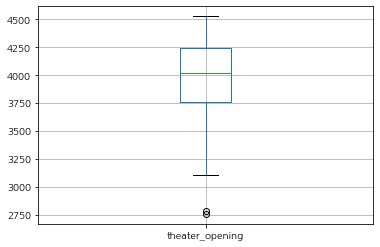

In [252]:
inventory_price[["theater_opening"]].boxplot()

In [176]:
# 인벤토리, 가격, 전처리
inventory_price.to_csv("movie_inventory_price")

## 고객 데이터 불러오기

In [104]:
customers = pd.read_csv("Data_OTT/movie_customer.csv", encoding="cp949")

In [131]:
customers.shape

(3277, 8)

In [106]:
download = pd.read_csv("Data_OTT/movie_down.csv")

In [107]:
download

,customer_id,item_id,down_date,down_year,down_month,down_weekday
0,C5001,I-1038,2015-01-08,2015,2015M01,Thu
1,C5001,I-1003,2015-01-17,2015,2015M01,Sat
2,C5001,I-1017,2015-01-17,2015,2015M01,Sat
3,C5001,I-1028,2015-01-19,2015,2015M01,Mon
4,C5001,I-1036,2015-01-20,2015,2015M01,Tue
...,...,...,...,...,...,...
116459,C8277,I-1087,2018-09-21,2018,2018M09,Fri
116460,C8277,I-1090,2018-09-29,2018,2018M09,Sat
116461,C8277,I-1088,2018-10-24,2018,2018M10,Wed
116462,C8277,I-1091,2018-10-25,2018,2018M10,Thu


In [108]:
cust_down = pd.merge(customers, download, on='customer_id')

In [111]:
cust_down.tail(10)

,customer_id,gender,age,age_group,married,kids_under12,area,subs_start_year,item_id,down_date,down_year,down_month,down_weekday
116454,C8277,M,37,30대,S,N,강남구,2018,I-1070,2018-01-26,2018,2018M01,Fri
116455,C8277,M,37,30대,S,N,강남구,2018,I-1093,2018-05-08,2018,2018M05,Tue
116456,C8277,M,37,30대,S,N,강남구,2018,I-1052,2018-05-27,2018,2018M05,Sun
116457,C8277,M,37,30대,S,N,강남구,2018,I-1017,2018-06-15,2018,2018M06,Fri
116458,C8277,M,37,30대,S,N,강남구,2018,I-1086,2018-08-17,2018,2018M08,Fri
116459,C8277,M,37,30대,S,N,강남구,2018,I-1087,2018-09-21,2018,2018M09,Fri
116460,C8277,M,37,30대,S,N,강남구,2018,I-1090,2018-09-29,2018,2018M09,Sat
116461,C8277,M,37,30대,S,N,강남구,2018,I-1088,2018-10-24,2018,2018M10,Wed
116462,C8277,M,37,30대,S,N,강남구,2018,I-1091,2018-10-25,2018,2018M10,Thu
116463,C8277,M,37,30대,S,N,강남구,2018,I-1016,2018-11-15,2018,2018M11,Thu


### 사용자 다운로드 횟수

In [167]:
count = pd.DataFrame(cust_down["customer_id"].value_counts())
count.rename(columns={"customer_id":"download_count"}, inplace = True)
count = count.rename_axis('customer_id').reset_index()

In [172]:
count.head()

,customer_id,count
0,C5966,101
1,C5694,99
2,C5916,99
3,C5396,98
4,C5039,98


In [174]:
customer_count = pd.merge(customers, count)

### 사용자 총 구매금액

### 고객 구매 데이터 활용
    - 총 가격 구하기
    - 총 가격에 따른 등급 나누기 

In [245]:
inventory_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_id            106 non-null    object 
 1   contract_year      106 non-null    int64  
 2   movie_id           106 non-null    object 
 3   title              106 non-null    object 
 4   price              106 non-null    float64
 5   release_year       106 non-null    int64  
 6   release_date       106 non-null    object 
 7   runtime            106 non-null    int64  
 8   mpa_rating         106 non-null    object 
 9   mpa_rating_origin  106 non-null    object 
 10  imdb_score         106 non-null    float64
 11  votes              106 non-null    int64  
 12  reviews_users      106 non-null    int64  
 13  reviews_critics    106 non-null    int64  
 14  budget             106 non-null    int64  
 15  income_usa         106 non-null    int64  
 16  income_ww          106 non

In [231]:
movie_data = pd.merge(inventory_price, cust_down, on = "item_id")

In [183]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116464 entries, 0 to 116463
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   customer_id        116464 non-null  object 
 1   gender             116464 non-null  object 
 2   age                116464 non-null  int64  
 3   age_group          116464 non-null  object 
 4   married            116464 non-null  object 
 5   kids_under12       116464 non-null  object 
 6   area               116464 non-null  object 
 7   subs_start_year    116464 non-null  int64  
 8   item_id            116464 non-null  object 
 9   down_date          116464 non-null  object 
 10  down_year          116464 non-null  int64  
 11  down_month         116464 non-null  object 
 12  down_weekday       116464 non-null  object 
 13  contract_year      116464 non-null  int64  
 14  movie_id           116464 non-null  object 
 15  title              116464 non-null  object 
 16  pr

In [232]:
p_count = movie_data.groupby(["customer_id"])["price"].sum()
price = pd.DataFrame(p_count)

In [233]:
customer_download = pd.merge(customer_count, price, on = "customer_id")
customer_download.rename(columns={"price":"total_price"}, inplace = True)

In [234]:
customer_download.head()

,customer_id,gender,age,age_group,married,kids_under12,area,subs_start_year,count,total_price
0,C5001,F,51,50대,M,N,용산구,2015,55,262000.0
1,C5002,M,22,20대,S,N,강남구,2015,23,102200.0
2,C5003,F,33,30대,M,Y,서대문구,2015,55,270800.0
3,C5004,F,24,20대,M,N,서대문구,2015,41,200400.0
4,C5005,F,35,30대,M,N,마포구,2015,34,165900.0


In [235]:
total_price = customer_download["total_price"]

(array([401., 585., 576., 584., 357., 340., 198., 116.,  93.,  27.]),
 array([ 14700.,  58430., 102160., 145890., 189620., 233350., 277080.,
        320810., 364540., 408270., 452000.]),
 <BarContainer object of 10 artists>)

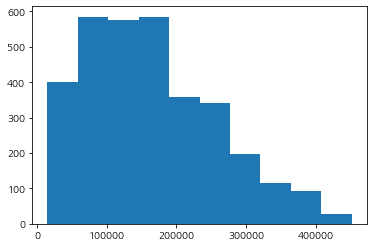

In [236]:
plt.hist(customer_download["total_price"])

- 14700 ~ 452000원까지 분포가 되어 있음

In [237]:
total_price.describe()

count      3277.000000
mean     165020.262435
std       93055.880442
min       14700.000000
25%       89500.000000
50%      150300.000000
75%      228000.000000
max      452000.000000
Name: total_price, dtype: float64

- 등급 만들기

In [238]:
conditionlist = [
    (customer_download['total_price'] <= 90000) ,
    (customer_download['total_price'] <= 150000) ,
    (customer_download['total_price'] <= 230000),
    (customer_download['total_price'] >= 230000)]
choicelist = ['Bronze', 'Silver', 'Gold', 'Platinum']
customer_download['class'] = np.select(conditionlist, choicelist, default='Not Specified')



In [239]:
customer_download.head()

,customer_id,gender,age,age_group,married,kids_under12,area,subs_start_year,count,total_price,class
0,C5001,F,51,50대,M,N,용산구,2015,55,262000.0,Platinum
1,C5002,M,22,20대,S,N,강남구,2015,23,102200.0,Silver
2,C5003,F,33,30대,M,Y,서대문구,2015,55,270800.0,Platinum
3,C5004,F,24,20대,M,N,서대문구,2015,41,200400.0,Gold
4,C5005,F,35,30대,M,N,마포구,2015,34,165900.0,Gold


In [240]:
customer_download.to_csv("movie_custom_class")

###  영화 데이터 수입 데이터
- 수입이 있는 영화는 94개이다.
- 수입이 없는 영화는 12개이다.

In [241]:
mp_count = movie_data.groupby(["title"])["price"].sum()
price = pd.DataFrame(mp_count)

In [242]:
price.rename(columns={"price":"total_price"}, inplace = True)

In [243]:
inventory_price.shape

(106, 32)

In [244]:
price.shape

(94, 1)

In [213]:
inv_pri_title = pd.merge(inventory_price, price, on = "title")

In [224]:
inv_pri_title

,item_id,contract_year,movie_id,title,price,release_year,release_date,runtime,mpa_rating,mpa_rating_origin,...,Genre_3,actor_1,actor_2,actor_3,contract_price,studio_score,price_class,total-opening,total_price,total_dollar
0,I-1001,2015,tt0121766,Star Wars: Episode III - Revenge of the Sith,5500.0,2005,05-19-2005,140,PG-13,PG-13,...,Fantasy,Ewan McGregor,Natalie Portman,Hayden Christensen,2700,10,10,2,3487000.0,3070.0
1,I-1002,2015,tt0330373,Harry Potter and the Goblet of Fire,4500.0,2005,11-18-2005,157,PG-13,PG-13,...,Fantasy,Eric Sykes,Timothy Spall,David Tennant,2700,10,10,0,4032000.0,3549.0
2,I-1003,2015,tt0363771,"The Chronicles of Narnia: The Lion, the Witc",5500.0,2005,12-09-2005,143,PG,PG,...,Fantasy,Georgie Henley,Skandar Keynes,William Moseley,2295,10,1,237,3536500.0,3113.0
3,I-1004,2015,tt0383574,Pirates of the Caribbean: Dead Man's Chest,5500.0,2006,07-07-2006,151,PG-13,PG-13,...,Fantasy,Johnny Depp,Orlando Bloom,Keira Knightley,2295,10,1,0,1474000.0,1298.0
4,I-1005,2015,tt0413300,Spider-Man 3,4000.0,2007,05-04-2007,139,PG-13,PG-13,...,Sci-Fi,Tobey Maguire,Kirsten Dunst,James Franco,2295,10,1,72,2564000.0,2257.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,I-1090,2018,tt1396484,It,4500.0,2017,09-08-2017,135,R,R,...,ETC,Jaeden Martell,Jeremy Ray Taylor,Sophia Lillis,2195,6,1,45,5584500.0,4916.0
90,I-1091,2018,tt3501632,Thor: Ragnarok,5500.0,2017,11-03-2017,130,PG-13,PG-13,...,Comedy,Chris Hemsworth,Tom Hiddleston,Cate Blanchett,2700,10,10,0,6781500.0,5970.0
91,I-1092,2018,tt0974015,Justice League,4500.0,2017,11-17-2017,120,PG-13,PG-13,...,Fantasy,Ben Affleck,Henry Cavill,Amy Adams,2295,10,1,0,5521500.0,4860.0
92,I-1093,2018,tt2380307,Coco,7200.0,2017,11-22-2017,105,PG,PG,...,Family,Anthony Gonzalez,Gael Garc��a Bernal,Benjamin Bratt,2700,10,10,0,12657600.0,11142.0


(array([13., 16., 17., 26., 11.,  4.,  2.,  1.,  2.,  2.]),
 array([  268000.,  2040700.,  3813400.,  5586100.,  7358800.,  9131500.,
        10904200., 12676900., 14449600., 16222300., 17995000.]),
 <BarContainer object of 10 artists>)

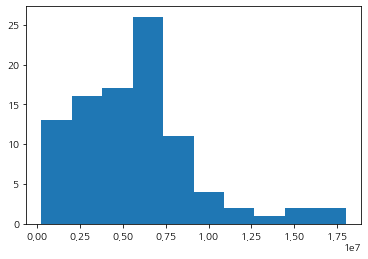

In [215]:
plt.hist(inv_pri_title["total_price"])

- 데이터 변경(원화 - 달러)

In [221]:
inv_pri_title["total_dollar"] = (inv_pri_title["total_price"] / 1136).round()

In [223]:
inv_pri_title

,item_id,contract_year,movie_id,title,price,release_year,release_date,runtime,mpa_rating,mpa_rating_origin,...,Genre_3,actor_1,actor_2,actor_3,contract_price,studio_score,price_class,total-opening,total_price,total_dollar
0,I-1001,2015,tt0121766,Star Wars: Episode III - Revenge of the Sith,5500.0,2005,05-19-2005,140,PG-13,PG-13,...,Fantasy,Ewan McGregor,Natalie Portman,Hayden Christensen,2700,10,10,2,3487000.0,3070.0
1,I-1002,2015,tt0330373,Harry Potter and the Goblet of Fire,4500.0,2005,11-18-2005,157,PG-13,PG-13,...,Fantasy,Eric Sykes,Timothy Spall,David Tennant,2700,10,10,0,4032000.0,3549.0
2,I-1003,2015,tt0363771,"The Chronicles of Narnia: The Lion, the Witc",5500.0,2005,12-09-2005,143,PG,PG,...,Fantasy,Georgie Henley,Skandar Keynes,William Moseley,2295,10,1,237,3536500.0,3113.0
3,I-1004,2015,tt0383574,Pirates of the Caribbean: Dead Man's Chest,5500.0,2006,07-07-2006,151,PG-13,PG-13,...,Fantasy,Johnny Depp,Orlando Bloom,Keira Knightley,2295,10,1,0,1474000.0,1298.0
4,I-1005,2015,tt0413300,Spider-Man 3,4000.0,2007,05-04-2007,139,PG-13,PG-13,...,Sci-Fi,Tobey Maguire,Kirsten Dunst,James Franco,2295,10,1,72,2564000.0,2257.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,I-1090,2018,tt1396484,It,4500.0,2017,09-08-2017,135,R,R,...,ETC,Jaeden Martell,Jeremy Ray Taylor,Sophia Lillis,2195,6,1,45,5584500.0,4916.0
90,I-1091,2018,tt3501632,Thor: Ragnarok,5500.0,2017,11-03-2017,130,PG-13,PG-13,...,Comedy,Chris Hemsworth,Tom Hiddleston,Cate Blanchett,2700,10,10,0,6781500.0,5970.0
91,I-1092,2018,tt0974015,Justice League,4500.0,2017,11-17-2017,120,PG-13,PG-13,...,Fantasy,Ben Affleck,Henry Cavill,Amy Adams,2295,10,1,0,5521500.0,4860.0
92,I-1093,2018,tt2380307,Coco,7200.0,2017,11-22-2017,105,PG,PG,...,Family,Anthony Gonzalez,Gael Garc��a Bernal,Benjamin Bratt,2700,10,10,0,12657600.0,11142.0


In [ ]:
inv_pri_title[""]